In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import requests
%matplotlib inline

In [13]:
stock_dict = {}

stock_list = []

date = input("Pick a start date for your analysis (YYYY-MM-DD): ")

while (True):
    name = input("Add a stock ticker to the list: ")
    stock_dict[name] = date
    stock_list.append(name)
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2020-01-01
Add a stock ticker to the list:  BA
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  TSLA
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [14]:
stock_dict

{'BA': '2020-01-01', 'TSLA': '2020-01-01'}

In [15]:
for key, value in stock_dict.items():
    print(value)

2020-01-01
2020-01-01


In [19]:
def stockCreation(stock_dict, stock_list):
    func_list = []
    for key, value in stock_dict.items():
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        globals()[key] = globals()[key]['Adj Close']
        func_list.append(globals()[key])
    
    portfolio = pd.concat(func_list, axis='columns', join='inner')
    portfolio.columns = stock_list
    
    return portfolio

In [21]:
portfolio = stockCreation(stock_dict, stock_list)
portfolio.head()

,BA,TSLA
Date,,
2020-01-02,331.348572,86.052002
2020-01-03,330.791901,88.601997
2020-01-06,331.766083,90.307999
2020-01-07,335.285156,93.811996
2020-01-08,329.410095,98.428001


In [25]:
def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    result = requests.get(url).json()
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']
company = portfolio.columns[0]
company_name = get_symbol(company)
print(f"The tick symbol {company} is the company {company_name}")

The tick symbol BA is the company The Boeing Company


## Performance Analysis

To evaluate the performance of a stock in a more meaningful way, we need to see change in time, usually day-by-day.

In [26]:
stock_performance = portfolio.pct_change().dropna()
stock_performance.head()

,BA,TSLA
Date,,
2020-01-03,-0.001680,0.029633
2020-01-06,0.002945,0.019255
2020-01-07,0.010607,0.038801
2020-01-08,-0.017523,0.049205
2020-01-09,0.014998,-0.021945


This graph shows us daily percent changes of ['BA', 'TSLA'].


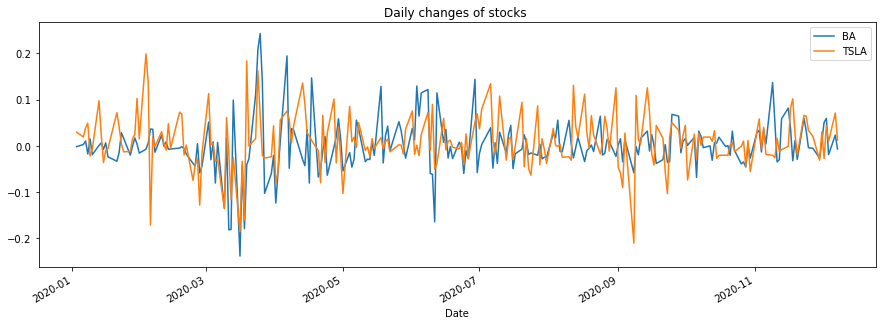

In [30]:

stock_performance_plt = stock_performance.plot.line(title = "Daily changes of stocks ", figsize=(15,5))
stock_performance_plt

print(f"This graph shows us daily percent changes of {stock_list}.")

In [31]:
stock_performance_cum = (1+stock_performance).cumprod()
stock_performance_cum.head()

,BA,TSLA
Date,,
2020-01-03,0.99832,1.029633
2020-01-06,1.00126,1.049458
2020-01-07,1.01188,1.090178
2020-01-08,0.99415,1.143820
2020-01-09,1.00906,1.118719


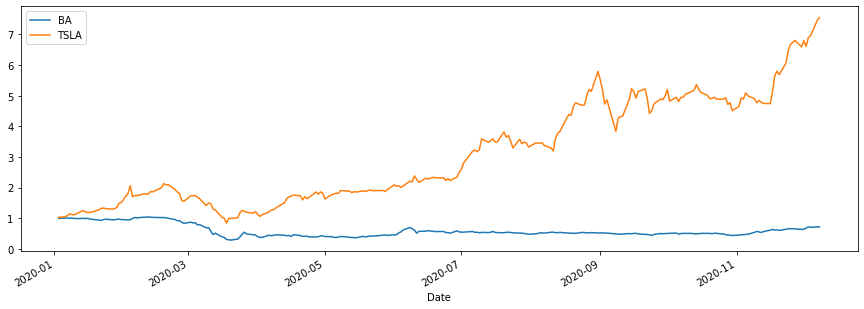

In [35]:
stock_performance_cum_plt = stock_performance_cum.plot.line(figsize=(15,5))
stock_performance_cum_plt